In [73]:
# Import relevant libraries and packages.
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels.api as sm
from statsmodels.graphics.api import abline_plot
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn import linear_model, preprocessing
from sklearn.linear_model import LinearRegression

In [57]:
# Import master table
df = pd.read_csv('..\Data Wrangling - Capstone 2/master.csv', index_col=0)
df.head()

,ID,Tower,Floor,Unit,Area,Flat Type,No. of Rooms,Price,Price per SA,PL_no,Date_PASP,Date_ASP,Trans_Price,Payment_Terms,first_sale
0,One_VicTower 1A1A,Tower 1A,1,A,643,3BR + 2B + 1K,3BR,"16,137,000","25,096",PL1,03/07/2021,03/07/2021,"$13,958,000",A,03/07/2021
1,One_VicTower 1A1B,Tower 1A,1,B,444,2BR + 1B + 1OK,2BR,"10,613,000","23,903",PL1,03/07/2021,03/07/2021,"$9,604,000",C,03/07/2021
2,One_VicTower 1A1C,Tower 1A,1,C,438,2BR + 1B + 1OK,2BR,"10,739,000","24,518",PL1,10/07/2021,10/07/2021,"$9,718,000",C,NaN
3,One_VicTower 1A1D,Tower 1A,1,D,444,2BR + 1B + 1OK,2BR,"11,355,000","25,574",PL2,03/07/2021,03/07/2021,"$9,822,000",A,03/07/2021
4,One_VicTower 1A1E,Tower 1A,1,E,426,2BR + 1B + 1OK,2BR,"11,009,000","25,843",PL2,03/07/2021,03/07/2021,"$9,963,000",C,03/07/2021


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1049 entries, 0 to 1048
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ID             1049 non-null   object
 1   Tower          1049 non-null   object
 2   Floor          1049 non-null   int64 
 3   Unit           1049 non-null   object
 4   Area           1049 non-null   int64 
 5   Flat Type      1049 non-null   object
 6   No. of Rooms   1049 non-null   object
 7   Price          685 non-null    object
 8   Price per SA   685 non-null    object
 9   PL_no          685 non-null    object
 10  Date_PASP      501 non-null    object
 11  Date_ASP       501 non-null    object
 12  Trans_Price    501 non-null    object
 13  Payment_Terms  501 non-null    object
 14  first_sale     400 non-null    object
dtypes: int64(2), object(13)
memory usage: 131.1+ KB


In [59]:
df.shape

(1049, 15)

In [60]:
df['Price'] = pd.to_numeric(df['Price'].str.replace(",", "", regex=True))

In [61]:
df['Trans_Price'] = df['Trans_Price'].str.replace(",", "", regex=True)
df['Trans_Price'] = pd.to_numeric(df['Trans_Price'].str.replace("$","", regex=True))

In [62]:
df['Price per SA'] = df['Price per SA'].str.replace(",", "", regex=True)
df['Price per SA'] = pd.to_numeric(df['Price per SA'].str.replace("$","", regex=True))

In [63]:
df['Date_PASP'] = pd.to_datetime(df['Date_PASP'])

In [64]:
df['Date_ASP'] = pd.to_datetime(df['Date_ASP'])

In [65]:
df['first_sale'] = pd.to_datetime(df['first_sale'])

In [66]:
df.head()

,ID,Tower,Floor,Unit,Area,Flat Type,No. of Rooms,Price,Price per SA,PL_no,Date_PASP,Date_ASP,Trans_Price,Payment_Terms,first_sale
0,One_VicTower 1A1A,Tower 1A,1,A,643,3BR + 2B + 1K,3BR,16137000.0,25096.0,PL1,2021-03-07,2021-03-07,13958000.0,A,2021-03-07
1,One_VicTower 1A1B,Tower 1A,1,B,444,2BR + 1B + 1OK,2BR,10613000.0,23903.0,PL1,2021-03-07,2021-03-07,9604000.0,C,2021-03-07
2,One_VicTower 1A1C,Tower 1A,1,C,438,2BR + 1B + 1OK,2BR,10739000.0,24518.0,PL1,2021-10-07,2021-10-07,9718000.0,C,NaT
3,One_VicTower 1A1D,Tower 1A,1,D,444,2BR + 1B + 1OK,2BR,11355000.0,25574.0,PL2,2021-03-07,2021-03-07,9822000.0,A,2021-03-07
4,One_VicTower 1A1E,Tower 1A,1,E,426,2BR + 1B + 1OK,2BR,11009000.0,25843.0,PL2,2021-03-07,2021-03-07,9963000.0,C,2021-03-07


In [67]:
# More correlation if closer to 1 or -1.
df.corr(method ='pearson')

,Floor,Area,Price,Price per SA,Trans_Price
Floor,1.000000,0.030433,0.217573,0.805774,0.117684
Area,0.030433,1.000000,0.961327,0.371631,0.957518
Price,0.217573,0.961327,1.000000,0.603836,0.996907
Price per SA,0.805774,0.371631,0.603836,1.000000,0.505694
Trans_Price,0.117684,0.957518,0.996907,0.505694,1.000000


In [68]:
df.corr(method ='kendall')

,Floor,Area,Price,Price per SA,Trans_Price
Floor,1.000000,0.005542,0.239014,0.624491,0.141685
Area,0.005542,1.000000,0.731834,0.185690,0.740651
Price,0.239014,0.731834,1.000000,0.471601,0.936425
Price per SA,0.624491,0.185690,0.471601,1.000000,0.307765
Trans_Price,0.141685,0.740651,0.936425,0.307765,1.000000


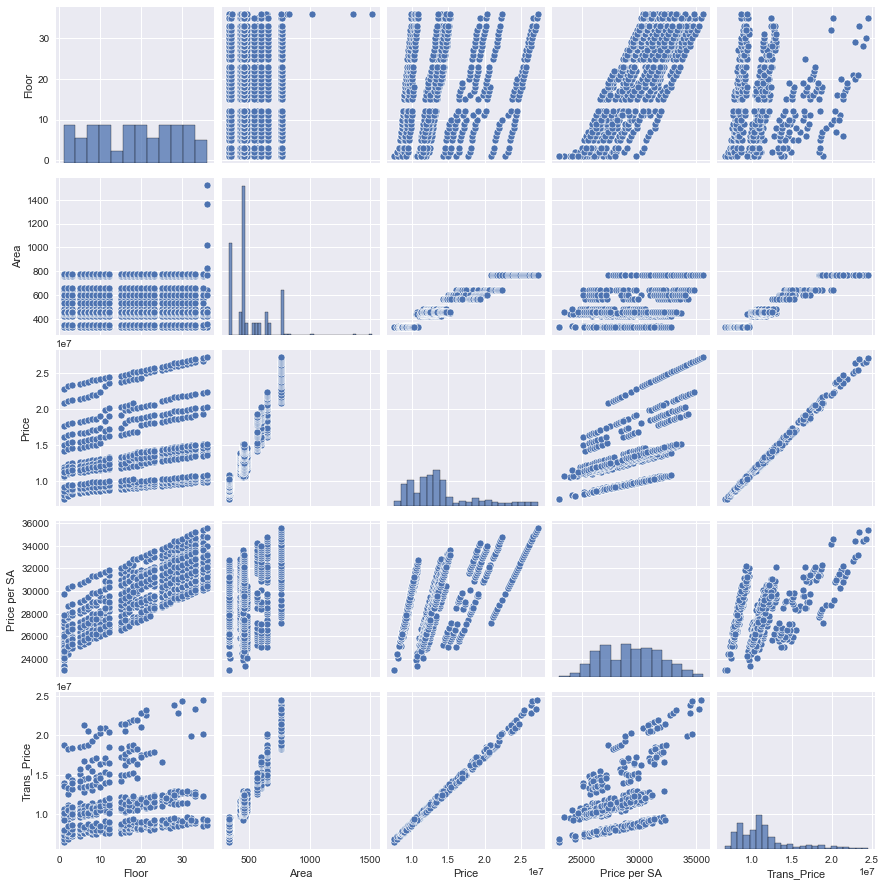

In [69]:
sns.pairplot(df)
plt.show()

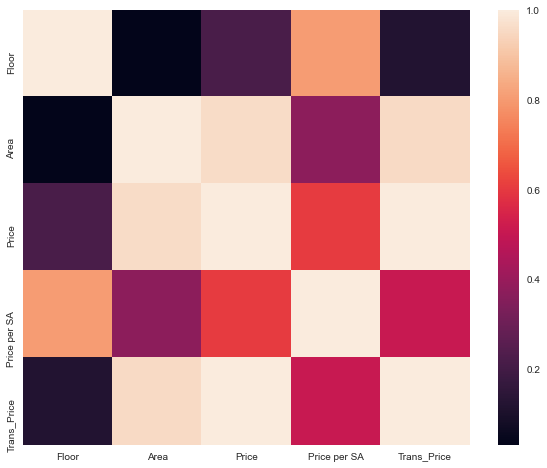

In [72]:
# Make a heatmap of the data 
plt.subplots(figsize=(10,8))
sns.heatmap(df.corr());
plt.show()

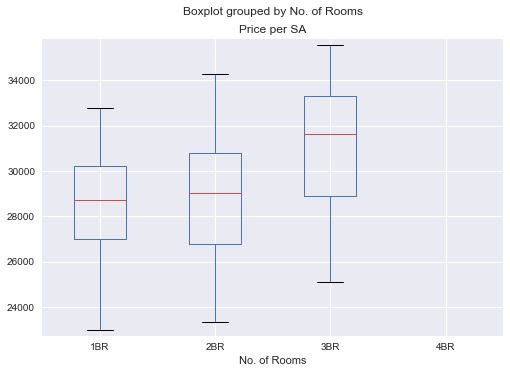

In [40]:
plt.style.use('seaborn')
df.boxplot(column="Price per SA", by='No. of Rooms')
plt.margins(0.02)
plt.show()

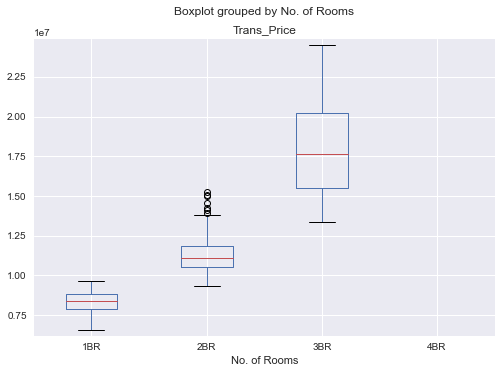

In [42]:
df.boxplot(column="Trans_Price", by='No. of Rooms')
plt.margins(0.02)
plt.show()